# Determination of Optimal Indicators for Heart Disease Classification
*15-388: Practical Data Science Final Project, by Abhiram Gogate (angogate) and Gaurav Chatterjee (gchatter)*

## Introduction
<img src="http://c1.staticflickr.com/1/261/18459649560_9ce7fc58c3_c.jpg" alt="Chest Pain" style="width: 600px;"/>
*Source: German Tenorio – [Source](https://www.flickr.com/photos/germantenorio/18459649560/in/photolist-u8dwG1-kLw6qC-cmEZsS-7qNvUt-C7gXzH-5fKo1E-CQrgJi-nEUBz2-nEJ7eA-dZbqGX-dZh8Zf-dZbrgi-dZh8e5-dZb3Z8-dZgJQU-nFfkrK-nFgrwB-mLj2S-nFfyxf-dZbrxc-9wkiQj-3RwdAr-mMYt1L-nFGCdx-CvXXS1-7cUDQ4-nEVhDz-dZbfaX-usTLMu-nXCpZW-nXCjgb-nVGp1E-nZx6se-nXCZ1s-aENb3u-dZaVnT-nVGoo7-nVGvqy-nVGvkd-nZwoJv-nFfBMu-nXD5W5-nXD5rY-nFgr7P-nVGubu-nZwny4-nZwnxx-nXD4M1-nFfoK8-nFfAcq)*

### Heart Disease
Heart disease is the leading cause of death in the United States. In 2014, the CDC reported that 614,348 people died as a result of heart disease, which was almost 20,000 above cancer, and almost 400,000 higher than the next leading cause of death, chronic lower respiratory diseases ([Source - Centers for Disease Control and Prevention](http://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm)). As a result, there is increased awareness about heart disease and prevention. Fundraisers such as [Jump Rope for Heart](http://www.heart.org/HEARTORG/Giving/ForIndividuals/JoinanEvent/Jump-Rope-for-Heart-Event_UCM_315609_SubHomePage.jsp#) are increasingly popular in the United States. Stopping heart disease is thus an extremely important problem in medical science today. 

From the results of previous studies, it is commonly known that there are various indicators that lead to heart disease. Some of these include smoking, family history, and body mass index (BMI) ([Source - Go Red for Women](https://www.goredforwomen.org/know-your-risk/find-out-your-risk/know-your-risk-for-cardiovascular-disease/)). The goal of this experiment is to **use a data-driven approach to determine the set of indicators that can best predict the presence of heart disease in a patient**. There is currently a large number of factors thought to indicate the presence of heart disease. This experiment will attempt to determine the ones that correlate most with the presence of heart disease by using various data science techniques.

### Methodologies
This report will go through the following steps to hopefully reach the goal of determining the most important features to use in prediction.

1. Data Gathering + Cleaning Data
2. Visualization!
3. Initial Predictions
4. Cross Validation
5. Feature Selection with Recursive Feature Elimination (RFE)
6. Conclusion

## Data Gathering + Cleaning Data

### Data Gathering
The first step was to find data related to heart disease and the list of features that are commonly considered indicators for heart disease, as described above. This data was then used to construct models for prediction of heart disease. After researching, a study uploaded by David W. Aha of the Naval Research Laboratory containing raw data which was perfect for these purposes. An example of a data dump is found [here](http://mlearn.ics.uci.edu/databases/heart-disease/cleveland.data). It is clear that the data is not pre-processed in any form, and is the result of raw data taken from the Cleveland Clinic (in Cleveland, OH). There are three other data dumps found on this website, which have data from hospitals in Budapest, Long Beach, and Zurich.

Credit for the data set is given to Dr. David W. Aha and to individuals at the hospitals themselves, which are:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The processed data available on the website was not used, as the team that generated it chose only certain features to include. Since the goal of the project is to determine the optimal set of features, the processed data was not considered for this report.

The datasets themselves have 57 different features, all of which were taken (for the most part) when a patient would enter the hospital. The last few variables are the labels, the most important of which is `num`, which is 0 on a negative diagnosis, and > 0 on a positive one. The dataset was not formatted though, and all the features and labels were seperated by either spaces or whitespace. So, first, a significant amount of data cleaning had to be done.


### Cleaning Data 
In this report, only the unprocessed Cleveland data set was considered. Ideally, these methodologies can be applied to any combination of data sets in a similar unprocessed format. 

The key was to note that the string "name" meant the start of a new data point. All data points ended with the name of the patient, which was set to the string "name" for privacy concerns.

The data was then loaded into a Pandas DataFrame, and each column was manually evaluated to determine overall usefulness to our project. This entailed removing columns with a large amount of information missing, and removing features such as cardiac catheterization date, which would clearly not help us predict the presence of heart disease. The names and explanations of the features can be found [here](http://mlearn.ics.uci.edu/databases/heart-disease/heart-disease.names). 

An important note: the `num` variable in the unprocessed data, as mentioned before has the value 0 if no heart disease is present, and 1,2,3,4 otherwise. Since the focus solely on classification, a new variable called `num_presence` was created, which is a boolean representing presence of heart disease.

In [2]:
import pandas as pd
import numpy as np
from StringIO import StringIO

def read_data_file(fname):
    '''parses data in .data format'''
    with open(fname, "rt") as fread:
        contents = fread.read()
        data = ""
        for c in contents.splitlines():
            if(c.startswith("299") and fname == "cleveland.data"):
                break # the last few rows in the file were corrupted, so they were not used
            data += c
            data += " "
    data = data.replace("name", ",")
    data = data.replace(" , ", ",")
    stringio = StringIO(data)
    res = pd.read_csv(stringio, sep=" ", lineterminator=",", header=None)
    # String io (above two lines) taken from: http://stackoverflow.com/questions/22604564/how-to-create-a-pandas-dataframe-from-string
    return res
    
def join_data_files(*args):
    '''returns a pandas dataframe with data from multiple .data files with the same columns'''
    L = []
    for i in xrange(len(args)):
        L.append(read_data_file(args[i]))
    return pd.concat(L)

df = join_data_files("cleveland.data") # other data sets are useless (lack of useful features)
df = df.dropna().reset_index(drop = True) # drop NaNs and reset the index
df = df.drop([0,1,7] + range(19,30) + [35] + range(39,43)+ [44,45] + range(51,57) + range(58,75), axis = 1)
# these are the columns we determined to be useless or irrelevant
df = df.replace(-9, np.nan) # our data source represented missing information with -9
df.columns = ["age", "sex", "painloc", "painexer", "relrest", "cp", "trestbps", "htn", "chol", "smoke", "cigs",
              "years", "fbs", "dm", "famhist", "restecg", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd",
              "trestbpd", "exang", "xhypo", "ca", "restef", "restwm", "exeref", "exerwm", "thal", "num"]
for col in df.columns:
    if df[col].isnull().sum() < 20: # if there are fewer than 20 NaNs in a column, we'll drop those rows
        df = df.dropna(axis=0, subset=[col])
df = df.dropna(axis=1) # we'll drop columns that have greater than 20 NaNs
df["num_presence"] = df["num"] != 0 # binary variable: 1 if heart disease, 0 if no heart disease
df = df.drop("num", axis=1)
print df.head()
print len(df.columns)

   age  sex  cp  trestbps  htn  chol  cigs  years  fbs  famhist      ...       \
0   63    1   1       145    1   233  50.0   20.0    1        1      ...        
1   67    1   4       160    1   286  40.0   40.0    0        1      ...        
2   67    1   4       120    1   229  20.0   35.0    0        1      ...        
3   37    1   3       130    0   250   0.0    0.0    0        1      ...        
4   41    0   2       130    1   204   0.0    0.0    0        1      ...        

   thalach  thalrest  tpeakbps  tpeakbpd  trestbpd  exang  xhypo   ca  thal  \
0      150        60       190        90        85      0      0  0.0   6.0   
1      108        64       160        90        90      1      0  3.0   3.0   
2      129        78       140        80        80      1      0  2.0   7.0   
3      187        84       195        68        78      0      0  0.0   3.0   
4      172        71       160        74        86      0      0  0.0   3.0   

   num_presence  
0         False  
1 

The following dictionaries represent the tags for each feature, as named in the unprocessed data. Each feature maps to a description of the feature.

In [3]:
tags = {
    "age"       : "Age (years)",
    "sex"       : "Sex (0 = female, 1 = male)",
    "cp"        : "Chest Pain Type (1 = typica angina, 2 = atypical angina,\n3 = non-anginal, 4 = asymptomatic)",
    "trestbps"  : "Resting Blood Pressure (mmHg)",
    "htn"       : "Hyptertension (0 = absent, 1 = present)",
    "chol"      : "Cholesterol (mg/dL)",
    "cigs"      : "Cigarettes (per day)",
    "years"     : "Duration of Status as Smoker (years)",
    "fbs"       : "Fasting Blood Sugar (0 = <120 mg/dL, 1 = >120 mg/dL",
    "famhist"   : "Family History of Coronary Artery Disease (0 = absent, 1 = present)",
    "restecg"   : "Resting Electrocardiographic Results (0 = normal,\n1 = abnormality, 2 = hypertrophy)",
    "met"       : "METs Achieved During Exercise (bpm)",
    "thalach"   : "Peak Exercise Heart Rate (bpm)",
    "thalrest"  : "Resting Heart Rate (bpm)",
    "tpeakbps"  : "Peak Exercise Blood Pressure (mmHg)",
    "tpeakbpd"  : "Peak Exercise Blood Pressure (mmHg)",
    "trestbpd"  : "Resting Blood Pressure (mmHg)",
    "exang"     : "Exercise-Induced Angina (0 = absent, 1 = present)",
    "xhypo"     : "Exercise-Induced Hypo. (0 = absent, 1 = present)",
    "ca"        : "Number of Major Vessels Colored By Fluoroscopy",
    "thal"      : "Blood Supply To Heart (3 = normal, 6 = fixed defect, 7 = reversible defect)"
}

simple_tags = {
    "age"       : "Age",
    "sex"       : "Sex",
    "cp"        : "Chest Pain",
    "trestbps"  : "Resting Blood Pressure",
    "htn"       : "Hyptertension",
    "chol"      : "Cholesterol",
    "cigs"      : "Cigarettes",
    "years"     : "Duration of Status as Smoker",
    "fbs"       : "Fasting Blood Sugar",
    "famhist"   : "Family History of Coronary Artery Disease",
    "restecg"   : "Resting Electrocardiographic Results",
    "met"       : "METs Achieved During Exercise",
    "thalach"   : "Peak Exercise Heart Rate",
    "thalrest"  : "Resting Heart Rate",
    "tpeakbps"  : "Peak Exercise Blood Pressure",
    "tpeakbpd"  : "Peak Exercise Blood Pressure",
    "trestbpd"  : "Resting Blood Pressure",
    "exang"     : "Exercise-Induced Angina",
    "xhypo"     : "Exercide-Induced Hypo.",
    "ca"        : "Number of Major Vessels Colored By Fluoroscopy",
    "thal"      : "Blood Supply To Heart"
}

## Visualization
Once the initial data curation and processing was completed, the data was then visualized.

### Histograms
The clearest visualizations in the case of this data set are **histograms** and **bar graphs**. This was done to effectively visualize whether or not each individual feature has a distinct effect on the outcome of the diagnosis. For example, one trend that was expected to be seen (but not eventually found) was that patients over the age of 50 were more likely to receive a yes diagnosis rather than a no. By our visualizations, such trends can easily be spotted.

After this, a histogram was created for each combination of features, and positive or negative diagnoses. The plots are shown below.

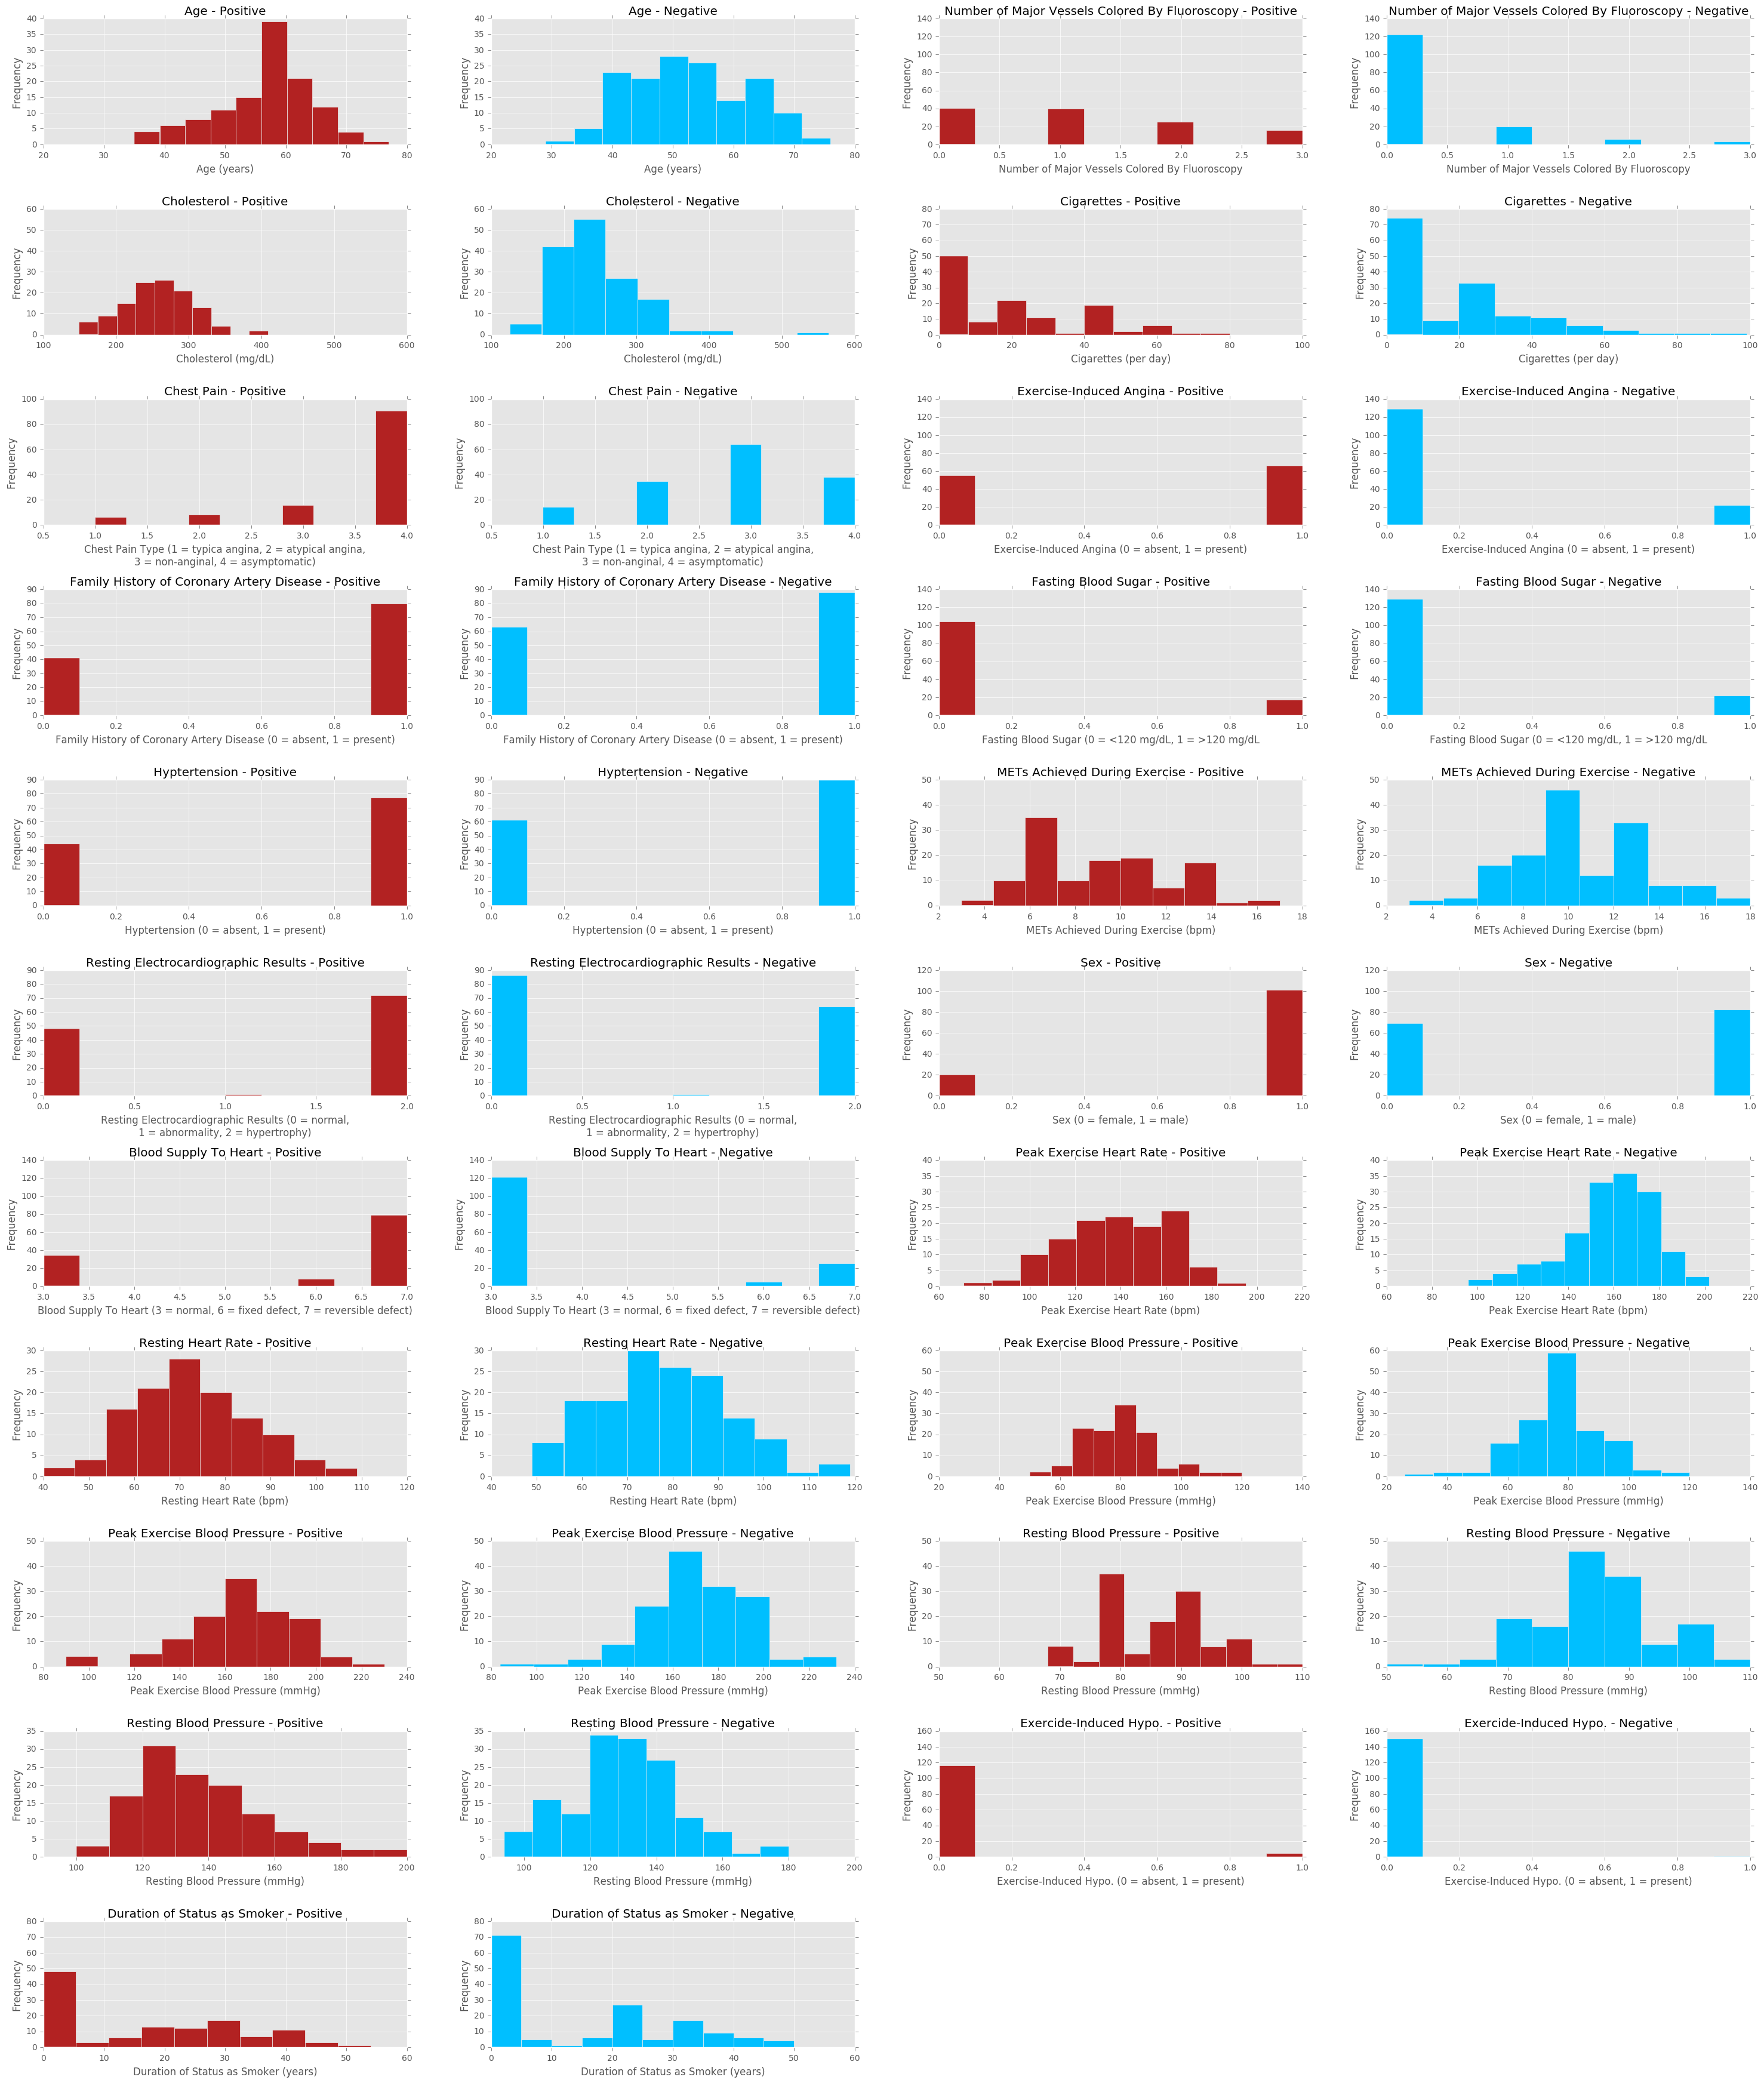

In [5]:
import matplotlib
matplotlib.use("svg")
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# referenced the documentation for all pyplot code (not copied from): http://matplotlib.org/api/pyplot_api.html

dict_df = {name:group for name, group in df.groupby(df["num_presence"])}
positives = dict_df[True]  # only patients with heart disease
negatives = dict_df[False] # only patients without heart disease

_, plots = plt.subplots(len(positives.columns)/2,4,figsize=(30,35))
for i in xrange(len(positives.drop("num_presence", axis=1).columns)):
    x = 2 if i%2 else 0
    col = sorted(positives.drop("num_presence", axis=1).columns)[i]
    # heart disease-positive plot
    plots[i/2,x].hist(positives[col], color="firebrick")
    plots[i/2,x].set_title("%s - Positive"%simple_tags[col])
    plots[i/2,x].set_xlabel(tags[col])
    plots[i/2,x].set_ylabel("Frequency")
    # heart disease-negative plot
    plots[i/2,x+1].hist(negatives[col], color="deepskyblue")
    plots[i/2,x+1].set_title("%s - Negative"%simple_tags[col])
    plots[i/2,x+1].set_xlabel(tags[col])
    plots[i/2,x+1].set_ylabel("Frequency")
    # set axes on both plots to largest it needs to be
    lims0 = plots[i/2,x].get_xlim() + plots[i/2,x].get_ylim()
    lims1 = plots[i/2,x+1].get_xlim() + plots[i/2,x+1].get_ylim()
    lims = [min([lims0[0], lims1[0]]), max([lims0[1], lims1[1]]), min([lims0[2], lims1[2]]), max([lims0[3], lims1[3]]),]
    plots[i/2,x].axis(lims)
    plots[i/2,x+1].axis(lims)
    
# remove extra plots at the end
plt.delaxes(plots[len(positives.columns)/2 - 1, 2])
plt.delaxes(plots[len(positives.columns)/2 - 1, 3])

plt.tight_layout()

### Bar Charts
As you can see, the data for indicators such as age follow something similar to a normal distribution, with the maximum number of positive cases topping out at around 55-60. The biggest problem with this data is that it is hard to draw conclusions from it, simply because for quite a few features, it is hard, or nearly impossible, to detect a trend in the data. Additionally, a major problem with this type of visualization, while useful for super quick detection of trends, is that it is biased towards characteristics of the general population. For example, it appears that patients aged 50-60 have the most risk of heart disease, but this could possibly just be because there are many more 50-60 year olds than any other age group.

To rectify this problem, bar graphs were made which plotted the ratio of positive cases to total cases for each data point in a feature. This aims to minimize the effect that is described above.

#### Percentage of Heart Disease Patients with Each Characteristic

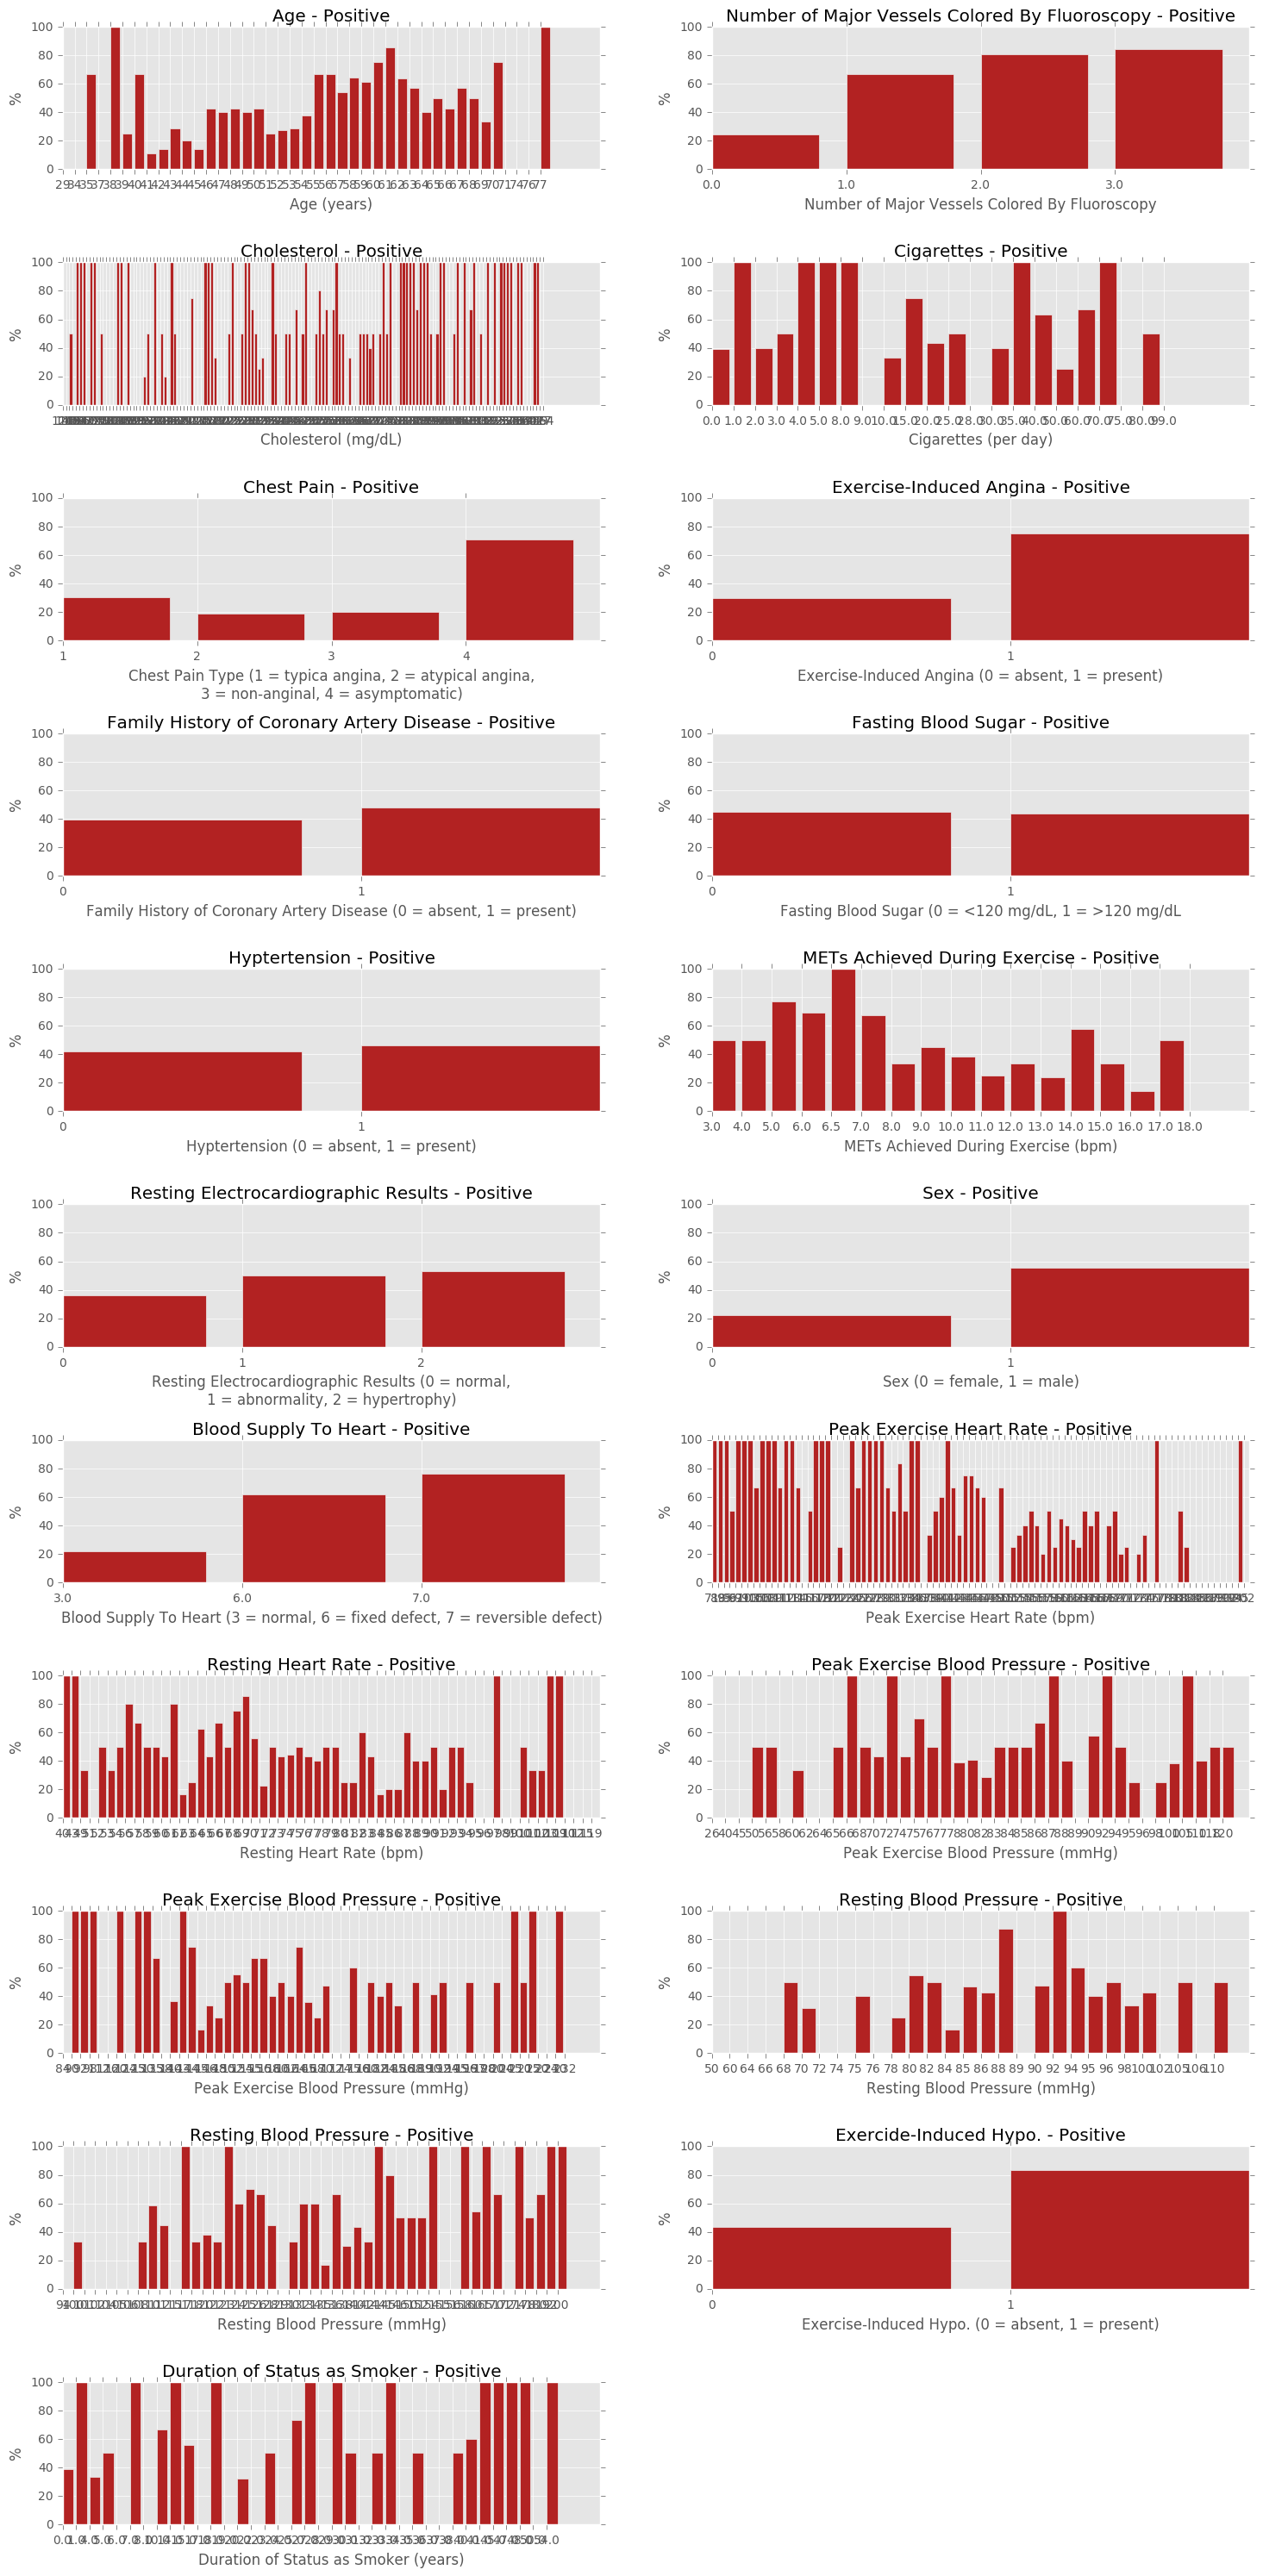

In [6]:
from collections import Counter

frames = {}
for col in positives.drop("num_presence", axis=1).columns: # find ratios
    totcounter = Counter(df[col])
    totcounts  = np.array([totcounter[ct] for ct in sorted(totcounter)])
    poscounter = Counter(positives[col])
    for key in totcounter:
        if key not in poscounter:
            poscounter[key] = 0
    poscounts  = np.array([poscounter[ct] for ct in sorted(poscounter)])
    frames[col] = (sorted(totcounter), 100*poscounts/totcounts.astype(float))
    
_, plots = plt.subplots(len(frames)/2 + 1,2,figsize=(15,30))
for i in xrange(len(frames)):
    col = sorted(frames)[i]
    plots[i/2,i%2].set_ylim([0,100])
    plots[i/2,i%2].bar(range(len(frames[col][1])), frames[col][1], tick_label=frames[col][0], color="firebrick")
    plots[i/2,i%2].set_title("%s - Positive"%simple_tags[col])
    plots[i/2,i%2].set_ylabel("%")
    plots[i/2,i%2].set_xlabel(tags[col])

plt.delaxes(plots[len(frames)/2,1])
    
plt.tight_layout()

It is clear that there are certain variables that display an increasing trend. One example is `age`. While the bars themselves are not monotonically increasing, it is clear that the majority of the ages in the right half of the graph have higher ratios than the ages in the left half of the graph. Similarily, `xhypo` is an example of an indicator feature which displays higher ratios when it is 1. From an informal visual analysis, it can be conjectured that `age`, `sex`, `cp`, `chol`, `years`, `famhist`, `restecg`, `exang`, `xhypo`, `ca`, and `thal` all are strong indicators of heart disease presence. Of course, this is an extremely informal analysis. However, it helps to establish a general idea of which features can be considered important. Later on in the report, a formal analysis with **Recursive Feature Elimination** (RFE) will be performed, and the results will compared to this informal analysis.

## Initial Predictions
Once initial data cleaning and visualizations were completed, predictions were made. For this report, five different kinds of classifiers were used: Support Vector Classification (SVC), Random Forests, Naive Bayes, Decision Trees, and Gradient Boosted Regression Trees.

The training and test data were split 70-30, and an offset of epsilon was introduced to prevent taking the log of 0.

First, these models were run on all possible features.

### Models Used
The models that will be used are as follows:
- **Support Vector Classification:** a classifier which plots points and constructs a dividing line/plane between positive and negative results, and uses this to predict test data. 
- **Random Forest Classifier:** a classifier that constructs many decision trees, where each decision tree is run with a random subset of the data. Additionally, at every split in a tree, a random subset of features is considered - this is to prevent overfitting.
- **Decision Tree Classifier:** a classifier that makes a decision tree where decisions (which way to traverse down the tree) are taken based on the values inside the training set provided.
- **Naive Bayes Classifier:** a classifier that is based on the application of Bayes' theorem with the assumption that all the features are independent of each other. ([Source - scikit-learn](http://scikit-learn.org/stable/modules/naive_bayes.html))
- **Gradient Booster Regression Trees Classfier:** a classifier that, like the random forest, considers multiple decision trees, and performs gradient descent on them ([Source - 15-388: Practical Data Science](http://datasciencecourse.org/decision_trees_boosting.pdf))

In [7]:
import math
from sklearn.svm            import SVC
from sklearn.ensemble       import RandomForestClassifier
from sklearn.naive_bayes    import GaussianNB
from sklearn.tree           import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model   import SGDClassifier
from sklearn.ensemble       import GradientBoostingClassifier

# creation of training and testing set

for col in df.columns:
    df.loc[:,col] = df[col].astype(float)

df_train = df.iloc[:197] # 70|30 split
df_test  = df.iloc[197:]
    
epsilon = 1e-10

X_train = (df_train + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_train = df_train["num_presence"].astype(int)

X_test = (df_test + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_test = df_test["num_presence"].astype(int)

X = (df.drop("num_presence", axis=1) + epsilon).apply(np.log10)
y = df["num_presence"].astype(int)

#list of classifiers
classifiers = [("Support Vector",       SVC()),
               ("Random Forest",        RandomForestClassifier(n_estimators=500)),
               ("Gaussian Naive Bayes", GaussianNB()),
               ("Decision Tree",        DecisionTreeClassifier()),
               ("Gradient Boosting",    GradientBoostingClassifier())]

#fit and predict (score)
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    print name, clf.score(X_test, y_test)

Support Vector 0.573333333333
Random Forest 0.786666666667
Gaussian Naive Bayes 0.786666666667
Decision Tree 0.706666666667
Gradient Boosting 0.813333333333


First, a couple of observations. As expected, gradient boosting and random forests did better than the decision tree. This is due to the fact that both are considered to usually have superior performance, as discussed in class. In addition, the Naive Bayes Classifier performed pretty well, as, generally speaking, a majority of the features can be considered independent of each other (e.g. `age` and `sex`). However, we can do better!

## Cross Validation

Cross validation, as described in class, is a method where the test set is held out while the training set is split into equal partitions, and the classifer is trained first with partitions of the training set. Then, after the classifier is trained enough, it is run on the holdout set to make more accurate predictions. In this report, **K-folds cross validation** will be used, which is a variant of cross validation that considers k different partitions.

One important application of cross validation is **Grid Search**. Grid Search is a way to select optimal internal parameters for any given model - for example, for SVC, *C* is an important parameter that needs tuning. For each model that is considered, different options for internal parameters are considered, and then Grid Search is run to determine the best set of parameters for each model.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
svm_tuned_parameters = [{"kernel": ["rbf"],    "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
                        {"kernel": ["linear"],                        "C": [1, 10, 100, 1000]}]
rf_tuned_parameters  = [{"n_estimators": [1, 100, 500, 1000], "max_features": [0.5, 10, None, "sqrt", "log2"]}]
gnb_tuned_parameters = [{}]
dt_tuned_parameters  = [{"splitter": ["best", "random"], "max_features": [0.5, 10, None, "sqrt", "log2"]}]
gb_tuned_parameters  = [{"n_estimators": [1, 100, 500, 1000], "learning_rate": [0.1, 0.05], "loss": ["deviance", "exponential"]}]

classifiers = [("Support Vector",       SVC(),                        svm_tuned_parameters),
               ("Random Forest",        RandomForestClassifier(),     rf_tuned_parameters ),
               ("Gaussian Naive Bayes", GaussianNB(),                 gnb_tuned_parameters),
               ("Decision Tree",        DecisionTreeClassifier(),     dt_tuned_parameters ),
               ("Gradient Boosting",    GradientBoostingClassifier(), gb_tuned_parameters )]

classifiers_tuned = []
for clf in classifiers:
    tuned = GridSearchCV(clf[1], clf[2])
    tuned.fit(X_train, y_train)
    print clf[0], "\t", tuned.score(X_test, y_test), "\t", tuned.best_params_
    classifiers_tuned.append((clf[0], tuned.best_estimator_))

Support Vector 	0.8 	{'kernel': 'linear', 'C': 1}
Random Forest 	0.786666666667 	{'max_features': 'sqrt', 'n_estimators': 100}
Gaussian Naive Bayes 	0.786666666667 	{}
Decision Tree 	0.76 	{'max_features': 10, 'splitter': 'best'}
Gradient Boosting 	0.813333333333 	{'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.1}


Now that the optimal features for each model have been determined, it is now time to move on to feature engineering, which will help to optimize the given models even more. More importantly, this will play a big role in determining which features are better indicators of heart disease.

## Manual Feature Engineering
So far, all 21 features that were deemed to be "clean" (not have an excessive amount of NA's) have been used in the models we have trained and predicted on so far.

However, it is clear that some features are better predictors of heart disease than others, and it is entirely possible that some features are not good predictors at all! It is necessary to thus consider our features, and figure out which ones are the most useful for our various models.

Luckily, this has already been done, as this was the whole point of the visualization component. It was determined, based on visual analysis, that `age`, `sex`, `cp`, `chol`, `years`, `famhist`, `restecg`, `exang`, `xhypo`, `ca`, and `thal` are among the strongest indicators of heart disease. Of course, these indicators can vary, so it is difficult to quantify the effectiveness of an indicator solely through looking at plots. A more thorough analysis will be done in the RFE section.

Thus, the features described above are a good place to start in the determination of which features to select. The other features are dropped, and the selected features above are kept. The prediction code is then run again, only considering the selected features.

In [20]:
bad_features = ["trestbps", "htn", "cigs", "fbs", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "trestbpd"]
df_manual = df.drop(bad_features, axis=1)

df_train = df_manual.iloc[:197]
df_test  = df_manual.iloc[197:]

X_train = (df_train + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_train = df_train["num_presence"].astype(int)

X_test = (df_test + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_test = df_test["num_presence"].astype(int)

for name, clf in classifiers_tuned:
    clf.fit(X_train, y_train)
    print name, clf.score(X_test, y_test)

Support Vector 0.8
Random Forest 0.813333333333
Gaussian Naive Bayes 0.826666666667
Decision Tree 0.706666666667
Gradient Boosting 0.813333333333


As seen by the results, the accuracy of each of our models either stayed the same or increased. This is a good indicator that the variables that were selected are stronger at predicting heart disease than the whole set of features. This process of visually picking features and constructing models with them can be done repeatedly. However, there is a scikit-learn module called feature selection that will help to determine the best features for a given model.

## Recursive Feature Elimination with Cross Validation

**Recursive Feature Elimination** (RFE) was used to determine the features that are the strongest indicators for each of the five models that are being considered. RFE is a form of feature selection that on each step of the selection, assigns weights after the given classifier has finished training.  Then, the feature with the lowest weight is discarded, and the process is recursively called on until half of the features remain (as per scikit-learn convention, found here ([Source - scikit-learn](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination)). In this report, RFECV (RFE with Cross Validation) is used, as cross validation is used to further determine the number of features and features to use, rather than defaulting to the top half. 

Note: RFECV was not run on Naive Bayes and Decision Trees. For decision trees, this was because the number of features needed for RFECV exceeds the number of max\_features determined for decision trees above. For Naive Bayes, this was because the classifier did not have a *coef\_* attribute, which is necessary for performing RFECV ([Source - scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)). 

In [23]:
from sklearn.feature_selection import RFECV

df_train = df.iloc[:197]
df_test  = df.iloc[197:]

X_train = (df_train + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_train = df_train["num_presence"].astype(int)

X_test = (df_test + epsilon).drop("num_presence", axis=1).apply(np.log10)
y_test = df_test["num_presence"].astype(int)

for name, clf in classifiers_tuned:
    try:
        selector = RFECV(clf) #set up the recursive feature elimination
        selector = selector.fit(X_train, y_train)
        print name, selector.score(X_test, y_test)
        print [X_train.columns[i] for i in xrange(len(X_train.columns) - 1) if selector.get_support()[i]]
        print selector.ranking_ #gets the rainking
        print
    except: # decision trees exceed max num features, so skip
        continue        

Support Vector 0.826666666667
['age', 'cp', 'trestbps', 'chol', 'thalach', 'thalrest', 'tpeakbps', 'ca']
[ 1  8  1  1 12  1  5  3 10 11  6  7  1  1  1  4  9  2 13  1  1]

Random Forest 0.84
['age', 'cp', 'trestbps', 'chol', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'trestbpd', 'ca']
[ 1  5  1  1  9  1  4  3  7  8  6  1  1  1  1  1  1  2 10  1  1]

Gradient Boosting 0.813333333333
['age', 'sex', 'cp', 'trestbps', 'htn', 'chol', 'cigs', 'years', 'fbs', 'famhist', 'restecg', 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd', 'trestbpd', 'exang', 'xhypo', 'ca']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



It can be seen that running RFECV for each of the models, once again, either increases or keeps the performance of the model the same. The recursive feature elimination has determined that the above lists of features create the best predictive model for heart disease. Thus, it can be concluded that these are the factors that are most correlated to the presence of heart disease, based on the RFECV.

One interesting point to note is that regressive feature elimination recommended that the Gradient Booster Regression Trees use all of the features to perform its predictions. This is because this model gives weights to the features, and thus chooses features on its own, eliminating the need to choose features with recursive feature elimination.

## Conclusion + Further Investigation
Heart disease is an extremely common illness in the United States, and hundreds of thousands of people die from it every year. There is a collection of features that is commonly associated by medical professionals and even everyday people to be strong indicators of heart disease, such as advanced age or smoking habits. The purpose of this project was to determine a set of indicators that best correspond to a positive diagnosis of heart disease. Having this kind of information would be extremely useful for doctors, who would then be able to focus on the indicators deemed most important. 

This can even be seen in the various data sets out there for heart disease. For example, after running RFECV, it was concluded that fluoroscopy test results ("ca") were an important feature in the diagnosis of heart disease. However, the doctors in Hungary failed to record this feature. It can be argued that if this feature is recorded in the future, it will lead to better diagnosis of heart disease: in a matter of life and death, every percent of accuracy matters.

There has been a lot of past and recent work in this field, and many past studies have attempted to classify heart disease based on certain features, similar to this report. Studies like [Dr. G. Parthiban and Dr. S.K.Srivatsa's 2012 study](http://research.ijais.org/volume3/number7/ijais12-450593.pdf) have been conducted to diagnose heart disease in diabetes patients. Their methodologies are similar to that of this report: they used a Naive Bayes Classifier and a Support Vector Machine. Another [study by S. U. Ghumbre and A. A. Ghatol](http://link.springer.com/chapter/10.1007/978-3-642-27443-5_25) used an SVM to predict heart disease for patients in India. Over the last 20 years, research has been done to predict the diagnosis of heart disease using SVM and Naive Bayes.

Our report attempts to go one step further by analyzing which variables are stronger indicators of heart disease. This was done by tuning the features to our models to find the best set of features to predict heart disease. In the future, more data will have to be collected, preferably with a focus on the features that we classified to be better indicators of heart disease. Additionally, in the future, different models can be used on the heart disease data, which will lead to higher accuracy rates for classification, and possibly even different sets of important indicators. 

### Additional Resources

A cool study that attempts to classify different sub-types of heart failure using similar techinques to the ones learned in class: [*Using methods from the data mining and machine learning literature for disease classification and prediction: A case study examining classification of heart failure sub-types* (Peter C. Austin et al)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4322906/)

Heart Disease Classification using Neural Networks: [*Analysis of Heart Diseases Dataset Using Neural Network Approach* (Dr. K. Usha Rani)](https://pdfs.semanticscholar.org/ddcf/cb154b5b5b241e376a6783e161e1c899bee7.pdf)

Heart Disease Classification with Decision Trees: [*Feature Analysis of Coronary Artery Heart Disease Data Sets* (Randa El-Bialy et al)](http://www.sciencedirect.com/science/article/pii/S1877050915029622)

## References
- http://datasciencecourse.org/decision_trees_boosting.pdf
- http://link.springer.com/chapter/10.1007/978-3-642-27443-5_25
- http://mlearn.ics.uci.edu/databases/heart-disease/cleveland.data
- http://mlearn.ics.uci.edu/databases/heart-disease/heart-disease.names
- http://research.ijais.org/volume3/number7/ijais12-450593.pdf
- http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV
- http://scikit-learn.org/stable/modules/naive_bayes.html
- http://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm
- http://www.heart.org/HEARTORG/Giving/ForIndividuals/JoinanEvent/Jump-Rope-for-Heart-Event_UCM_315609_SubHomePage.jsp
- http://www.sciencedirect.com/science/article/pii/S1877050915029622
- https://pdfs.semanticscholar.org/ddcf/cb154b5b5b241e376a6783e161e1c899bee7.pdf
- https://www.flickr.com/photos/germantenorio/18459649560/in/photolist-u8dwG1-kLw6qC-cmEZsS-7qNvUt-C7gXzH-5fKo1E-CQrgJi-nEUBz2-nEJ7eA-dZbqGX-dZh8Zf-dZbrgi-dZh8e5-dZb3Z8-dZgJQU-nFfkrK-nFgrwB-mLj2S-nFfyxf-dZbrxc-9wkiQj-3RwdAr-mMYt1L-nFGCdx-CvXXS1-7cUDQ4-nEVhDz-dZbfaX-usTLMu-nXCpZW-nXCjgb-nVGp1E-nZx6se-nXCZ1s-aENb3u-dZaVnT-nVGoo7-nVGvqy-nVGvkd-nZwoJv-nFfBMu-nXD5W5-nXD5rY-nFgr7P-nVGubu-nZwny4-nZwnxx-nXD4M1-nFfoK8-nFfAcq
- https://www.goredforwomen.org/know-your-risk/find-out-your-risk/know-your-risk-for-cardiovascular-disease/
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4322906/